In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from fcit import fcit

## LINGAUSS Data

In [2]:
dim = 1
n = 100000
#np.random.seed(125)
'''
z -> sample n x d from multivariate gaussian
'''

#independent

z1 = np.random.multivariate_normal(mean = np.zeros(dim), cov = np.eye(dim), size = (n))



'''
A -> dim x dim 
'''

A1 = np.random.normal(loc = 0, scale = 1, size = dim*dim).reshape(dim,dim)
B1 = np.random.normal(loc = 0, scale = 1, size = dim*dim).reshape(dim,dim)

x1 = A1@z1.T + np.random.multivariate_normal(mean = np.zeros(dim), cov = np.eye(dim), size = (n)).T
y1 = B1@z1.T + np.random.multivariate_normal(mean = np.zeros(dim), cov = np.eye(dim), size = (n)).T



In [3]:
#dependent

z2 = np.random.multivariate_normal(mean = np.zeros(dim), cov = np.eye(dim), size = (n))

A2 = np.random.normal(loc = 0, scale = 1, size = dim*dim).reshape(dim,dim)
B2 = np.random.normal(loc = 0, scale = 1, size = dim*dim).reshape(dim,dim)

x2 = A2@z2.T + np.random.multivariate_normal(mean = np.zeros(dim), cov = np.eye(dim), size = (n)).T
y2 = B2@x2 + np.random.multivariate_normal(mean = np.zeros(dim), cov = np.eye(dim), size = (n)).T



Text(0.5, 1.0, 'dependent')

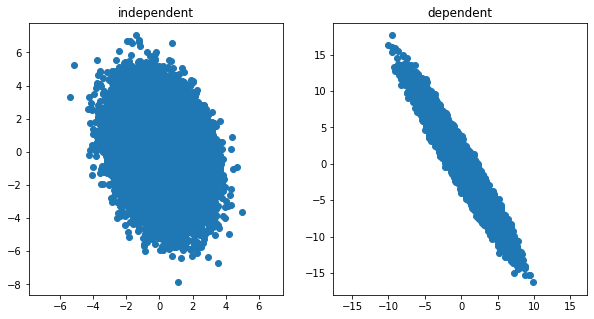

In [4]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.axis('equal')
plt.scatter(x1,y1)
plt.title('independent')

plt.subplot(1,2,2)
plt.axis('equal')
plt.scatter(x2,y2)
plt.title('dependent')

In [5]:
print(fcit.test(x1.T, y1.T, z1)) #ind, expect close to 1 

print(fcit.test(x2.T, y2.T, z2)) #dep, expect close to 0


0.3304263948174583
2.0473325219068378e-13


In [6]:
def gen_ind_gauss(dim, n):
    
    z = np.random.multivariate_normal(mean = np.zeros(dim), cov = np.eye(dim), size = n)

    A = np.random.normal(loc = 0, scale = 1, size = dim*dim).reshape(dim,dim)
    B = np.random.normal(loc = 0, scale = 1, size = dim*dim).reshape(dim,dim)
    
    x = A.dot(z.T) + np.random.multivariate_normal(mean = np.zeros(dim), cov = np.eye(dim), size = n).T
    y = B.dot(z.T) + np.random.multivariate_normal(mean = np.zeros(dim), cov = np.eye(dim), size = n).T
    
    return x, y, z
    
    
    
def gen_dep_gauss(dim, n):
    z = np.random.multivariate_normal(mean = np.zeros(dim), cov = np.eye(dim), size = n)

    A = np.random.normal(loc = 0, scale = 1, size = dim*dim).reshape(dim,dim)
    B = np.random.normal(loc = 0, scale = 1, size = dim*dim).reshape(dim,dim)

    x = A.dot(z.T) + np.random.multivariate_normal(mean = np.zeros(dim), cov = np.eye(dim), size = n).T
    y = B.dot(x) + np.random.multivariate_normal(mean = np.zeros(dim), cov = np.eye(dim), size = n).T
    
    return x, y, z

In [7]:
#dims = [1, 2, 4, 8, 16, 32, 64, 128, 256]
#dims = [1]
dim = 1
samps = [int(i) for i in np.arange(10e2, 10e5+1, 50000*2)]


#for dim in dims:

ind_p_vals = {}

dep_p_vals = {}

for n in samps:

    ind_x, ind_y, ind_z = gen_ind_gauss(dim, n)

    dep_x, dep_y, dep_z = gen_dep_gauss(dim, n)

    ind_p_vals[n] = fcit.test(ind_x.T, ind_y.T, ind_z)

    dep_p_vals[n] = fcit.test(dep_x.T, dep_y.T, dep_z)

    

        
        
    


In [8]:
with open('ind_p.pickle', 'wb') as handle:
    pickle.dump(ind_p_vals, handle)
    
    
    
with open('dep_p.pickle', 'wb') as handle:
    pickle.dump(dep_p_vals, handle)
    
    
with open('ind_p.pickle', 'rb') as handle:
    ind_p_vals = pickle.load(handle)
    
    
    
with open('dep_p.pickle', 'rb') as handle:
    dep_p_vals = pickle.load(handle)

In [26]:
t0 = [i for i in ind_p_vals.keys()]
t1 = [i for i in ind_p_vals.values()]

t2 = [i for i in dep_p_vals.keys()]
t3 = [i for i in dep_p_vals.values()]


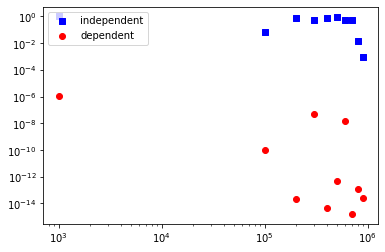

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(t0, t1, c='b', marker="s", label='independent')
ax1.scatter(t2, t3,  c='r', marker="o", label='dependent')
ax1.set_yscale('log')
ax1.set_xscale('log')
plt.legend(loc='upper left');
plt.show()

In [ ]:
dims = [1, 2, 4, 8, 16, 32, 64, 128, 256]
samps = [int(i) for i in np.arange(10e2, 10e5+1, 50000*2)]


ind_store = {}
dep_store = {}

for dim in dims:

    ind_p_vals = {}

    dep_p_vals = {}

    for dim in dims:

        for n in samps:

            ind_x, ind_y, ind_z = gen_ind_gauss(dim, n)

            dep_x, dep_y, dep_z = gen_dep_gauss(dim, n)

            ind_p_vals[n] = fcit.test(ind_x.T, ind_y.T, ind_z)

            dep_p_vals[n] = fcit.test(dep_x.T, dep_y.T, dep_z)
        
    ind_store[dim] = ind_p_vals
    dep_store[dim] = dep_p_vals